# Overview

Functionality implemented so far:
1. Read excel files and plot raw traces of graphs
2. Find & calculate responding cells `calc_response_rate`
3. Graph max utp response for each slide
3. Plot average values for control groups vs. L89A overexpressed groups

TODO's:
** Please open an issue for anything that should be implemented! **

# Code

## Imports

In [11]:
# Import modules for working with excel sheets and for plotting

# matplotlib: module for plotting
# pandas: module for working with dataframe (can be imported from excel, csv, txt)
# %: ipython magic, to plot graphs in line
# seaborn: easier to make plots
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
%matplotlib inline

In [2]:
# `PLOT' is a global variable that needs to be set to `True' to actually plot things in this notebook
PLOT = True

## Exploratory Data Analysis (*EDA*)

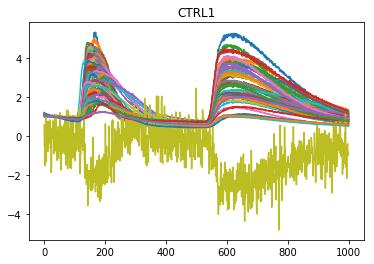

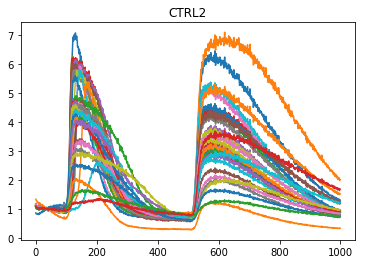

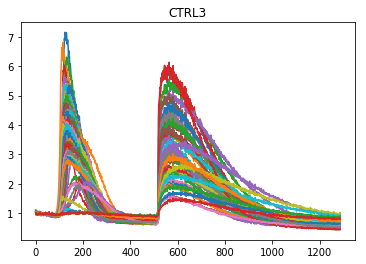

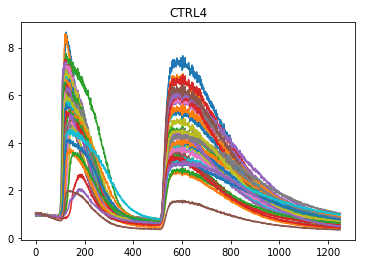

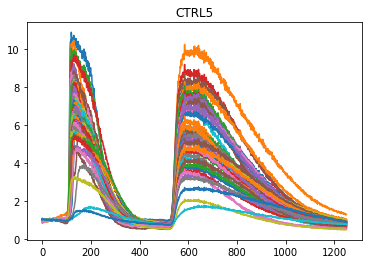

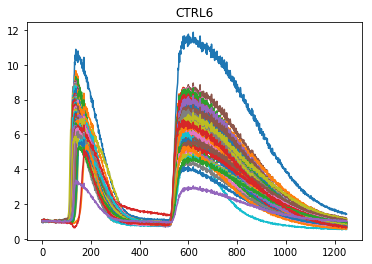

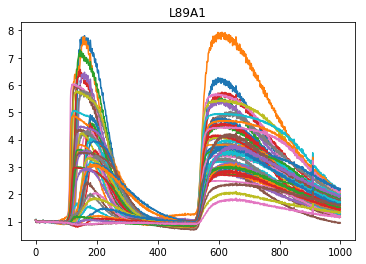

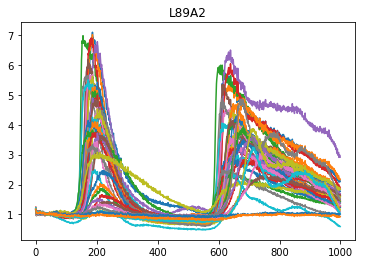

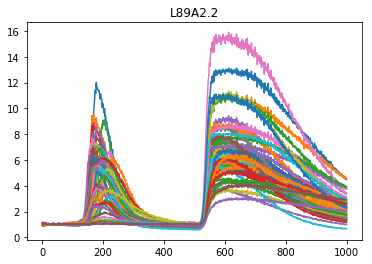

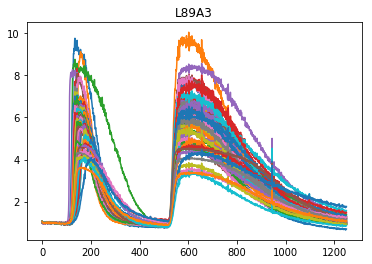

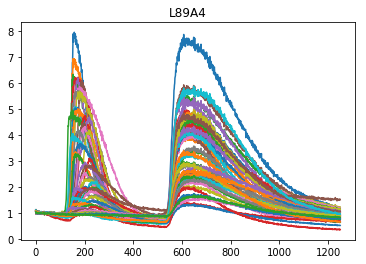

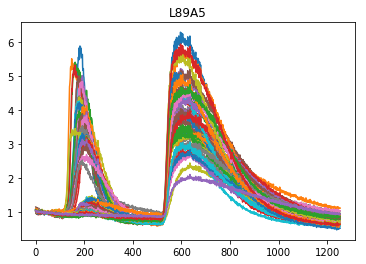

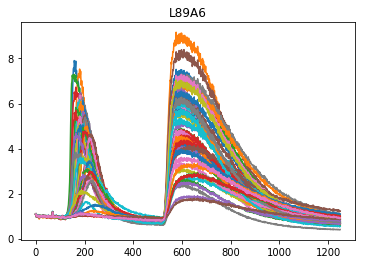

In [3]:
# First look at data, plot every single trace
# Import excel file, read and sort subsheets alphabetically, import 1302 rows
number_of_rows = 1302
ca_data = pd.ExcelFile('../assets/2018September11_23h49min14s_sorted_transformed_data.xlsx', nrows=number_of_rows)

# Sort sheetname alphabetically, plot data with sheetnames
sheetnames = ca_data.sheet_names.copy()
sheetnames.sort()
for sheetname in sheetnames: 
    temp = pd.read_excel(ca_data, sheetname)
    if PLOT:
        temp.plot(title=sheetname, legend=False)

   Sheet name  Total cells  Non-responding  Percentage responding
0       CTRL1           55               0             100.000000
1       CTRL2           34               0             100.000000
2       CTRL3           54               5              90.740741
3       CTRL4           36               0             100.000000
4       CTRL5           51               0             100.000000
5       CTRL6           65               0             100.000000
6       L89A1           47               4              91.489362
7       L89A2           42               4              90.476190
8     L89A2.2           56               3              94.642857
9       L89A3           52               0             100.000000
10      L89A4           53               8              84.905660
11      L89A5           45              10              77.777778
12      L89A6           47               5              89.361702
Statistics for control cells
Total cells              49.166667
Non-respondi

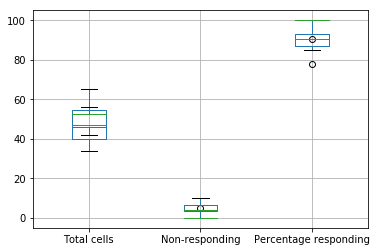

In [8]:
#Find percentage of responding cells per slide
#Find average according to grouping

def calc_response_rate(df, threshold=1.2, utp_range=(40,480), verbose=False):
    """
    this function calculates the response rate for calcium imaging data sets
    it takes a pandas.io.excel.ExcelFile and iterates over all data sheets and 
    columns in the input data frames
    
    ------------------------------
    arguments:
    df        - input data
    threshold - defaults to 1.2, the response threshold for your dataset
    utp_range - defaults to (40,480), a tuple indicating the range in which to look 
    verbose   - defaults to False, if True, verbose output is printed (use it to suppress output)
    """
    sheetnames = df.sheet_names.copy()
    sheetnames.sort()
    counter = 0
    col_counter = 0
    appended_data = []
    for sheetname in sheetnames: 
        #print("this is a new sheet: {}".format(sheetname))
        selected_df = pd.read_excel(df, sheetname)[utp_range[0]:utp_range[1]]
        selected_df_max = selected_df.max()
        
        # counter in 1st but not 2nd loop so it's reset to 0 after every sheet but not after every column
        counter = 0
        col_counter = 0
        for idx in selected_df_max.index:
            col_counter += 1
            if selected_df_max[idx] >= threshold:
                pass
                # TODO: implement actual functionality
                # print("current idx: {}".format(idx))
                # print(utp_max[idx])
            else:
                counter = counter + 1 # shorthand for this is: counter += 1, in cool languages (computer languages): counter++
        
        d = {'Sheet name':[sheetname], 'Total cells':[col_counter], 'Non-responding': [counter],'Percentage responding': [100-(counter*100/col_counter)]}
        data=pd.DataFrame(d)
        appended_data.append(data)
    appended_data = pd.concat(appended_data,ignore_index=True) 
    if verbose:
        print(appended_data)
    if PLOT:
        appended_data.loc[0:5].boxplot()
        appended_data.loc[6:12].boxplot()
    if verbose:
        print('Statistics for control cells')
        print(appended_data.loc[0:5].mean())
        print('Statistics for L89A cells')
        print(appended_data.loc[6:12].mean())
        
# call the newly created `calc_response_rate' function (output is suppressed)        
calc_response_rate(ca_data, threshold=1.2, utp_range=(40, 480), verbose=True)

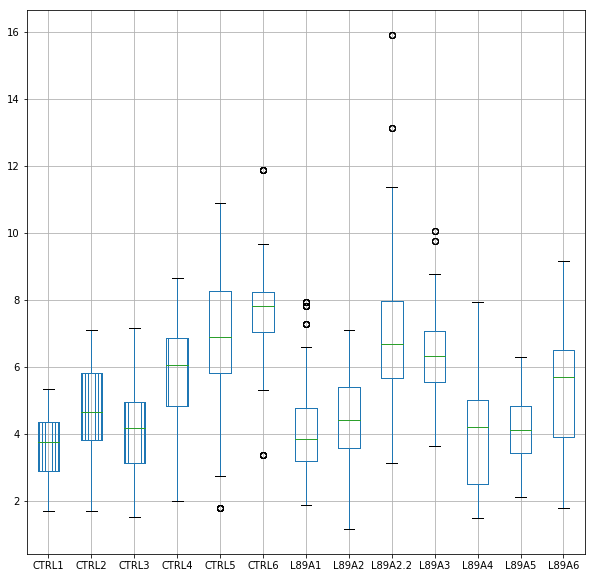

In [5]:
# Find max UTP response for each slide & plot (no threshold so far)
d = {}
sheetnames = ca_data.sheet_names.copy()
sheetnames.sort()
for sheetname in sheetnames: 
    # print("Sheet: {}".format(name))
    temp = pd.read_excel(ca_data, sheetname).max()
    d[sheetname] = temp
    if PLOT:
        pd.DataFrame(d).boxplot(figsize=(10,10))

   Sheet name  Max UTP response
0       CTRL1          3.590547
1       CTRL2          4.629974
2       CTRL3          4.076675
3       CTRL4          5.815918
4       CTRL5          6.898256
5       CTRL6          7.632217
6       L89A1          4.220858
7       L89A2          4.427743
8     L89A2.2          7.094816
9       L89A3          6.349200
10      L89A4          3.950152
11      L89A5          4.209603
12      L89A6          5.316882
Statistics for control cells
Max UTP response    5.810608
dtype: float64


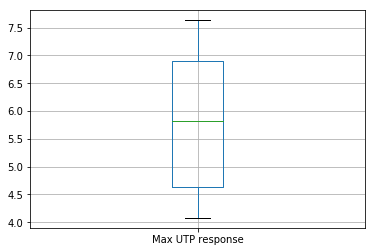

In [10]:
# Find max UTP response for each group & plot (no threshold so far)
sheetnames = ca_data.sheet_names.copy()
sheetnames.sort()
appended_data = []
for sheetname in sheetnames: 
    temp = pd.read_excel(ca_data, sheetname).max()
    d = {'Sheet name':[sheetname], 'Max UTP response':[temp.mean()]}
    d_utp_max = pd.DataFrame(d)
    # print(d_utp_max)
    appended_data.append(d_utp_max)
appended_data = pd.concat(appended_data,ignore_index=True) 
print(appended_data)

if PLOT:
    appended_data.loc[1:5].boxplot()
    print('Statistics for control cells')
    print(appended_data.loc[1:5].mean())

Statistics for L89A cells
Max UTP response    4.956459
dtype: float64


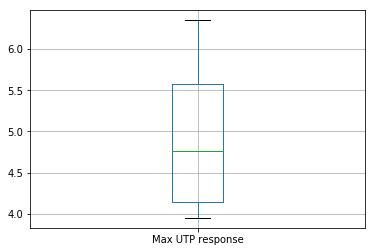

In [7]:
if PLOT:
    print('Statistics for L89A cells')
    print(appended_data.loc[9:12].mean())
    appended_data.loc[9:12].boxplot()


In [41]:
#Making place holder
sheetnames = ca_data.sheet_names.copy()
sheetnames.sort()
appended_data_ctrl = []
appended_data_L89A = []

for sheetname in sheetnames:
    #print("this is a new sheet: {}".format(sheetname))
for result in results:
control_pattern = re.compile("CTRL[0-9]*")
result = control_pattern.match('sheetname')
    if result:
        print("matched successfully")
    else:
        print("did not match")



this is a new sheet: CTRL1


NameError: name 'results' is not defined